<a href="https://colab.research.google.com/github/Nicobpm/selled_games_around_the_world/blob/main/Proyect_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#Se importan las librerias que se usaran para realizar el analisis de los datos.

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math as mt
from datetime import datetime
import math
import pandas


In [86]:
#Se realiza el cargue de la base de datos, en este caso se encuentra cargada
#  en github
df = pd.read_csv("https://raw.githubusercontent.com/Nicobpm/selled_games_around_the_world/main/games.csv")

In [87]:
#Revisamos el tipo de informacion contenida en el dataframe cargado
df.info()
print()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se realizara la transformacion de los datos de mayusculas a minisculas

In [88]:
#Se realiza la respectiva transformacion de la informacion para no generar
#novedades en las consultas y codigo

df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se realizara la validacion de los valores nulos y se remplazaran por "unknow" para poder analizar datos mas presisos y garantes asi mismo se realizara la validacion de los valores ausentes en las columnas de calificacion y se remplazar por "unknow" para poder generar los reportes numericos sin problemas.

adicional se puede evidenciar que hay juegos que no han sido valorados por los consumidores

<!-- Al darnos cuenta en las validaciones de los valores ausentes podemos determinar que hay juegos que no han sido valorados aun por sus compradores -->

In [89]:
#Se procede a remplazar los valores faltantes
df["year_of_release"] = df["year_of_release"].fillna(0)
df["genre"] = df["genre"].fillna("unknow")
df["name"] = df["name"].fillna("unknow")
df["critic_score"] = df["critic_score"].fillna("NaN")
df["user_score"] = df["user_score"].replace("tbd", "NaN")
df["user_score"] = df["user_score"].fillna("NaN")
df["rating"] = df["rating"].fillna("unknow")
print(df.isna().sum())
print()
df.head()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow


Se realiza el cambio de typo de dato float a dato int (numero entero) en la columna "year_of_release"

In [90]:
df["year_of_release"] = df["year_of_release"].astype("int")
df["critic_score"] = df["critic_score"].replace("unknow", "nan").astype(float)
df["user_score"] = df["user_score"].replace("unknow", "nan").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Chequeo de duplicados

In [91]:
print(f'El total de filas duplicadas es de {df.duplicated().sum()}')

El total de filas duplicadas es de 0


In [92]:
na = df["na_sales"]
eu = df["eu_sales"]
jp = df["jp_sales"]
os = df["other_sales"]

df["total_sales"] = na + eu + jp + os

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow,31.38


Se realiza la creacion de una columna nueva llamada 'total_sales' la cual contiene la suma de las ventas de las todas las regiones


# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

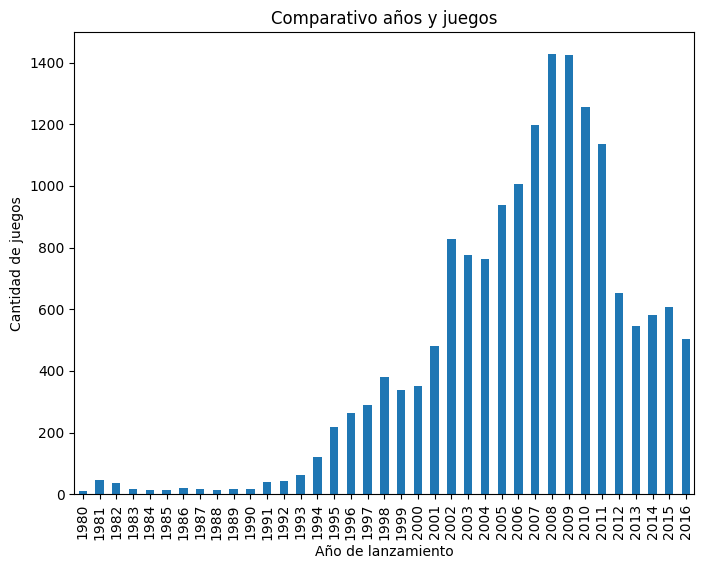

In [93]:
#Se realizara la creacoion de un grafico comparativo de venta de juegos al
#pasar los años.

Comparativa_de_plataformas = df.groupby(by = ["year_of_release"])[
    "name"].count().reset_index().query("year_of_release > 0")

Comparativa_de_plataformas.plot(kind = "bar",
                                  x = "year_of_release",
                                  y = "name",
                                  title = "Comparativo años y juegos",
                                  ylabel = "Cantidad de juegos",
                                  xlabel = "Año de lanzamiento",
                                  legend = False,
                                  figsize = [8, 6],
                                  )

plt.show()

Como podemos observar, nos encontramos con una grafica que nos muestra claramente que en los años 2007 al 2011 han sido los mas productivos, y han venido una tendencia a la baja con la generacion de nuevos videojuegos esto se puede deber a menos inversion en la misma


# Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año

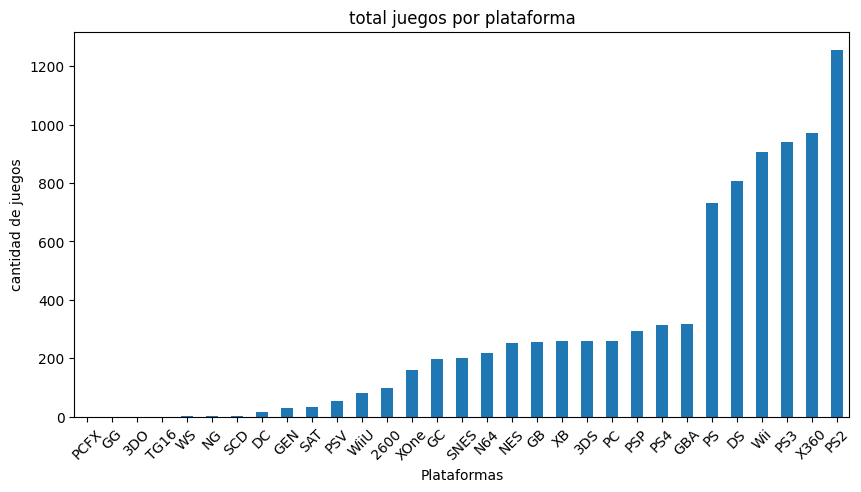

In [94]:
#Se creara una grafica para revisar las ventas entre las plataformas

ventas_por_plataforma = df.groupby("platform")["total_sales"].sum().sort_values()

ventas_por_plataforma.plot(title = "total juegos por plataforma",
                          kind = "bar",
                          x = "platform",
                          y = "name",
                          xlabel = "Plataformas",
                          ylabel = "cantidad de juegos",
                          figsize=[10, 5],
                          rot=45,
                          )
plt.show()

Como podemos observar existen 6 plataformas que han generado mas ventas de juegos hasta la fecha de generacion de la base de datos


# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [96]:
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer
# y las antiguas en desaparecer?

#creamos un dataframe ordenando los valores de los años y omitiendo
#los valores vacios o en cero que podran afectar en el analisis
df_order_year = df.sort_values(by = "year_of_release")
df_order_year = df_order_year[df_order_year["year_of_release"] > 0]

#Se crea la variable conteniendo las plataformas a analizar
plataformas = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX']


# se crea una funcion que itele por cada plataforma para tomar los años de
# exitencia de la misma
def Vida_util_por_plataforma(df, plataforma):

    vidas_utiles = {}  # Diccionario para almacenar las vidas útiles de las plataformas

    for plataforma in plataformas:

        # Filtra el DataFrame por la plataforma actual
        plataforma_df = df_order_year[df_order_year['platform'] == plataforma]

        # Calcula la vida útil de la plataforma actual
        vida_util = plataforma_df['year_of_release'].max() - \
        plataforma_df['year_of_release'].min()

        # Agrega la vida útil al diccionario
        vidas_utiles[plataforma] = vida_util

    return vidas_utiles

#escribimos el codigo que ejecutara la funcion anteriormente creada creando un
# diciconario con los datos de cada plataforma
vidas_utiles = Vida_util_por_plataforma(pivot_data2, plataformas)

#Convertimos el diccionario en un dataframe
vidas_utiles = pd.DataFrame(list(vidas_utiles.items()), columns=['plataforma',
                                                                 'vida_util'])
#Finalmente ssacamos el promedio de los años de vida por plataforma
vidas_utiles = vidas_utiles["vida_util"].mean()

print(f"El promedio de los años de vida de una plataforma es de {vidas_utiles}\
entre las {len(plataformas)} plataformas contenidas en el dataframe")

El promedio de los años de vida de una plataforma es de 7.612903225806452entre las 31 plataformas contenidas en el dataframe


# Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

##¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

vamos a evidenciar la linea de vida de cada plataforma al pasar de los años

Como podemos observar evidenciamos que apartir del año 2000 vemos un auge en la creacion de juegos 


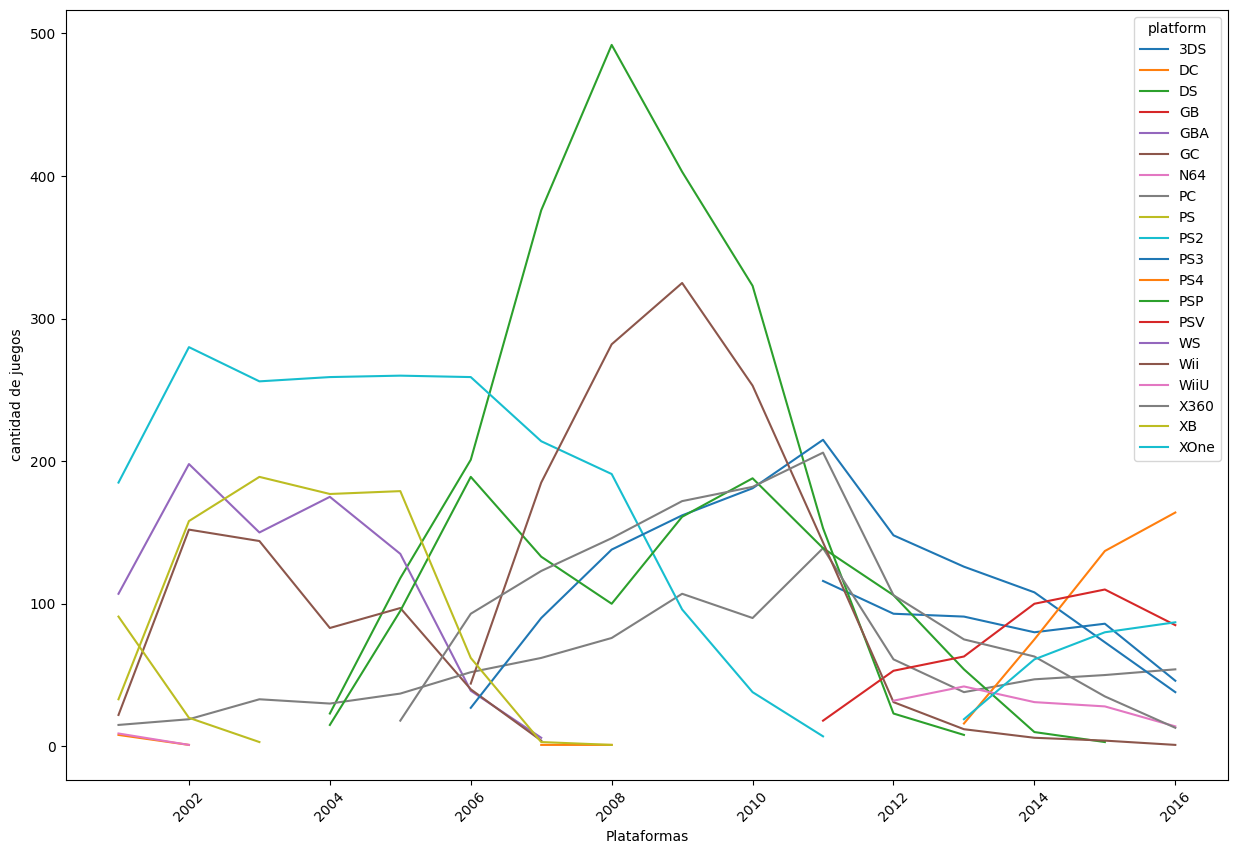

In [110]:
#se crea el dataframe para contener la informacion necesaria para la grafica
#comparativa de venta de juegos por año y plataforma

tabla_JUEGOS_por_año = df.groupby(["year_of_release", "platform"])[
    "name"].count().reset_index().query("year_of_release > 2000")

ventas_por_plataforma_año = pd.pivot_table(
    tabla_JUEGOS_por_año, index="year_of_release", columns="platform", values="name", aggfunc="sum")

ventas_por_plataforma_año.plot.line(figsize=[15,10],
                         xlabel="Plataformas",
                         ylabel="cantidad de juegos",
                         rot=45,)

print("vamos a evidenciar la linea de vida de cada plataforma al pasar de los años")
print()
print("Como podemos observar evidenciamos que apartir del año 2000 vemos un auge en la creacion de juegos ")

basados en los datos de los analisis anteriores podemos determinar que los datos de alto valor para realizar analisis seran desde el año 2000 ya que vemos una alta produccion de juegos.

# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

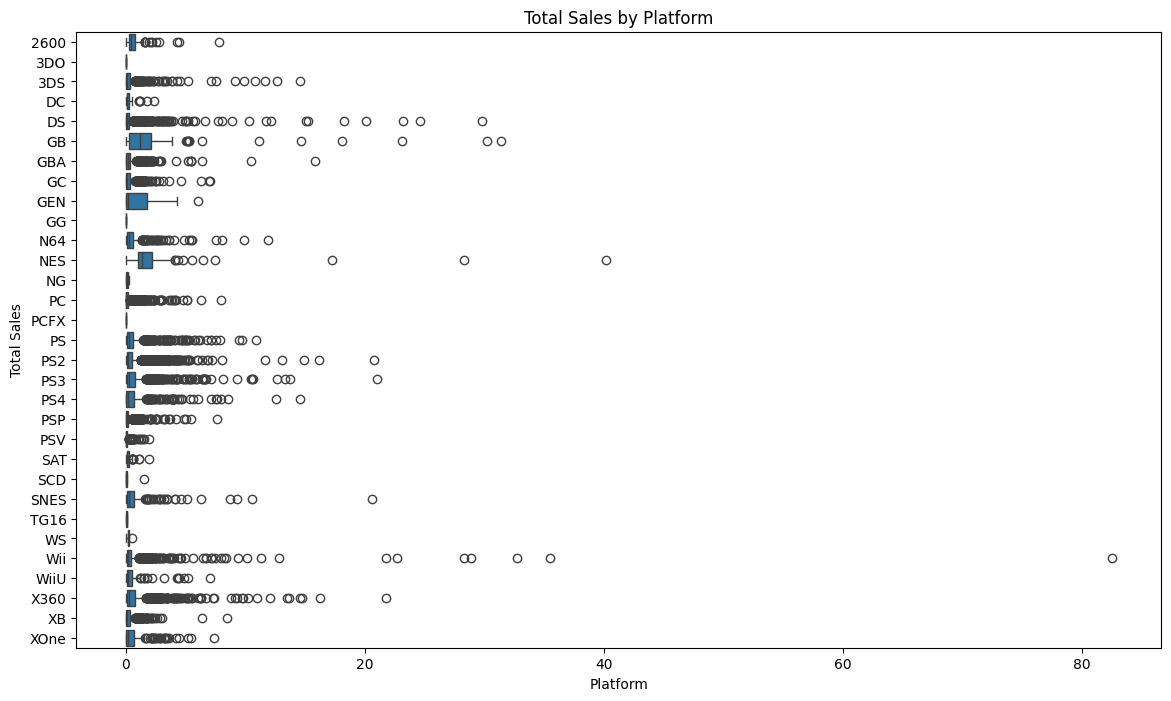

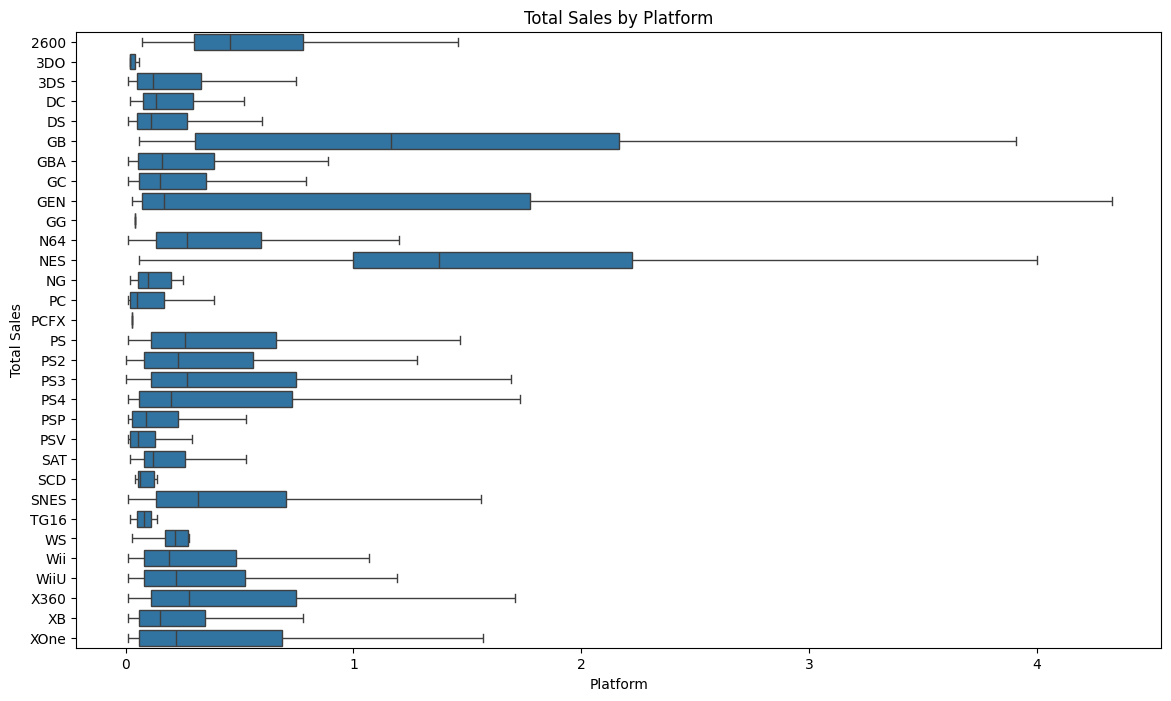

In [108]:
#filtred relevant data from year 2000 to more recent
Datos_relevantes = df.query("year_of_release >= 0")
Datos_relevantes_graph = Datos_relevantes.pivot_table(index="platform",columns= "name", values="total_sales",aggfunc="sum").reset_index()
Datos_relevantes_graph_melted = Datos_relevantes_graph.melt(
    id_vars="platform", var_name="name", value_name="total_sales")

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='platform', data=Datos_relevantes_graph_melted)
# Add title and labels
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

print()

#create a new boxplot avoiding the outliers
plt.figure(figsize=(14, 8))
sns.boxplot(x='total_sales', y='platform', data=Datos_relevantes_graph_melted, showfliers=False)
# Add title and labels
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()




como podemos observar hay varias diferencias entre los valores atipicos, adicional a esto se puede evidenciar en la segunda grafica de caja sin valores atipicos que el promedio de ventas por plataforma no varian mucho.

# Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.

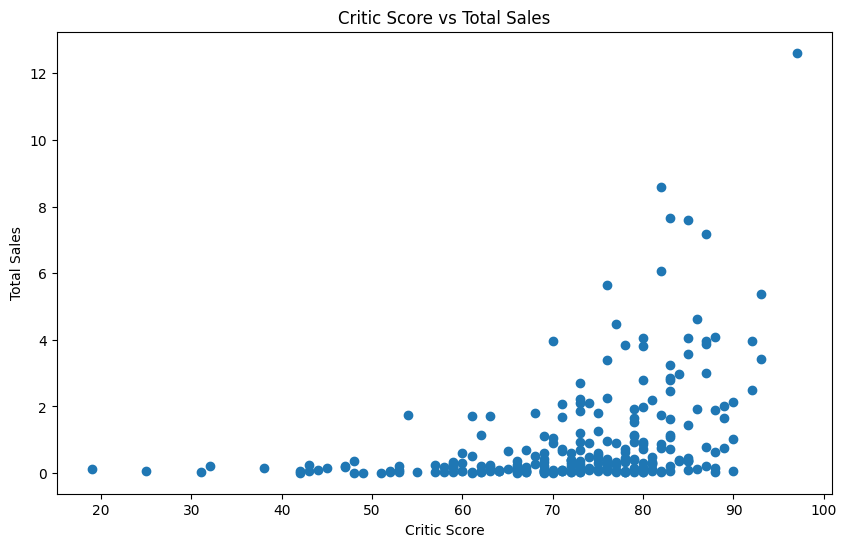

In [98]:
#Vamos a seleccionar las columnas que se usaran en este apartado
columns = ['platform', "name", 'critic_score', 'total_sales']

#se filtrara la infomracion seleccionando la plataforma especifica y teniendo
#en cuenta las columnas seleccionadas
Plataforma_ps4=df[columns].query("platform == 'PS4'")

#ahora se creara una grafica de dispercion para interpretar los datos
plt.figure(figsize=(10, 6))
plt.scatter(Plataforma_ps4['critic_score'], Plataforma_ps4['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Critic Score vs Total Sales')
plt.show()

Como podemos observar, se evidencia que los juegos vendidos en la plataforma PS4 con un critic_score de mas de 70% se vendieron en la misma tendencia en las demas plataformas teniendo una correlacion positiva.

# ¿Qué se puede decir de los géneros más rentables?


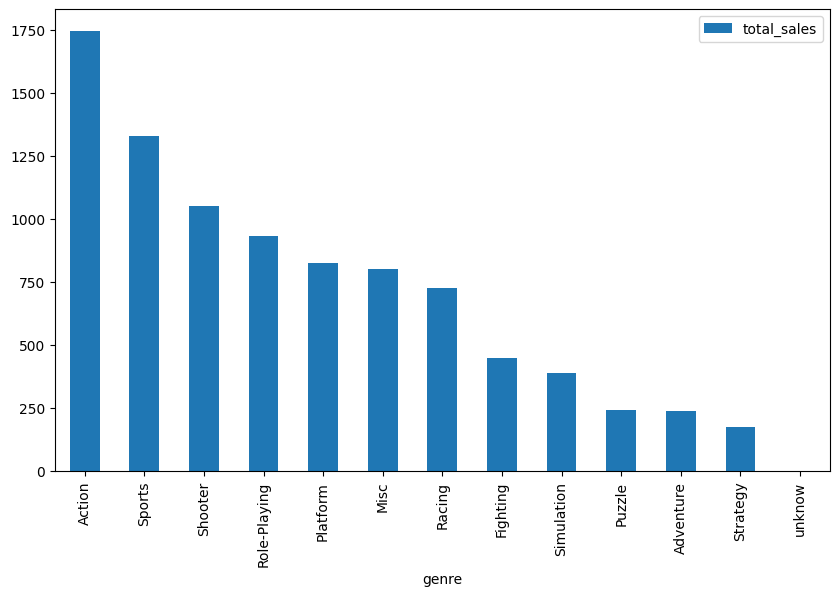

In [100]:
df_pivot_games=df.pivot_table(index="genre",values="total_sales",aggfunc="sum",).sort_values(by="total_sales",ascending=False)
df_pivot_games.plot(kind="bar",
                    figsize=(10,6))
plt.show()

Se puede apreciar que se cuenta con un total de 3 generos Action. Sports, Shooter  los cuales son los mas rentables ya que cuentan con mas de un 1000 ventas.

# ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


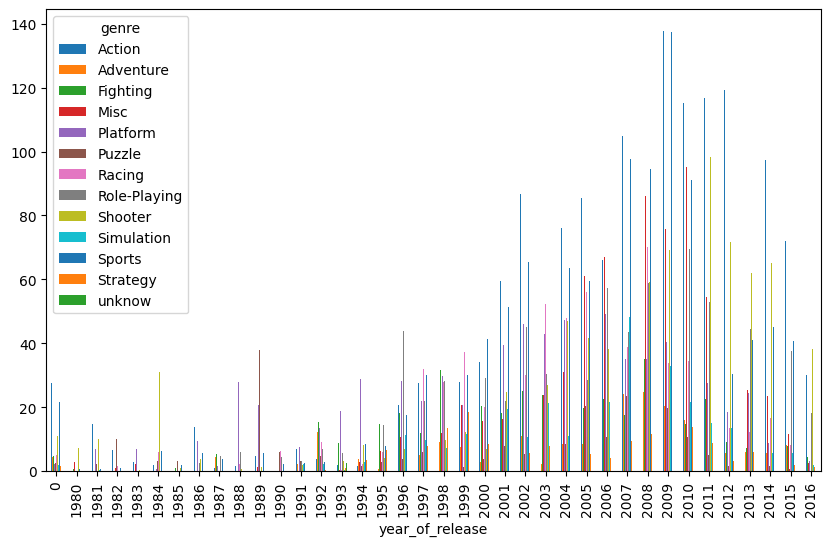

In [101]:
df_pivot_games_years=df.pivot_table(index="year_of_release",
                                    columns="genre",
                                    values="total_sales",
                                    aggfunc="sum",)
df_pivot_games_years.plot(kind="bar",
                    figsize=(10,6))
plt.show()

podemos generalizar que los juegos con ventas altas siempre han sido los mismos, y los generos de juegos con ventas bajas tambien han sido bajas al pasar de los años y encomparacion con los otros generos

# Crea un perfil de usuario para cada región, con Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

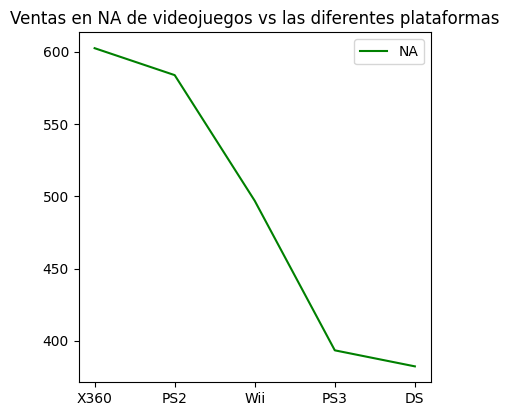

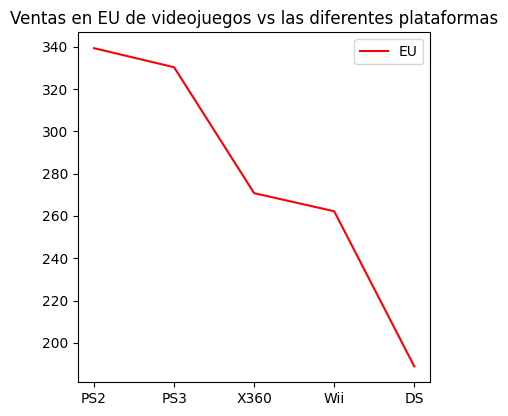

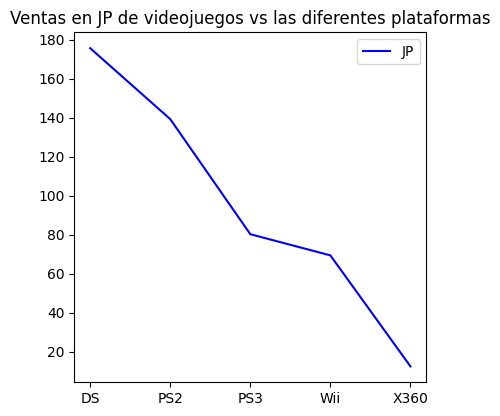

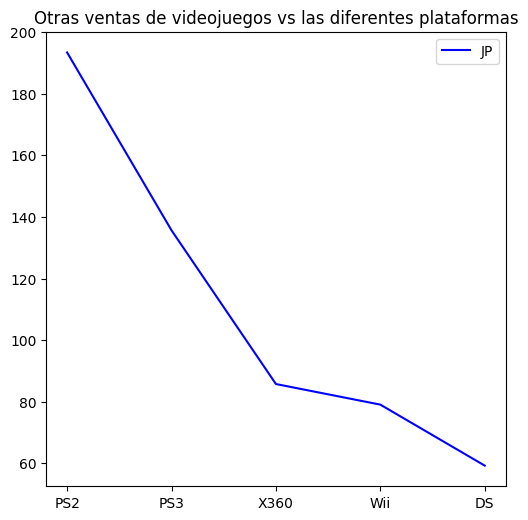

In [102]:
na_sales=df.groupby(by=["platform"])['na_sales'].sum()
na_sales=na_sales.loc[["DS","Wii","PS3","X360","PS2"]]
na_sales=pd.DataFrame(na_sales)
na_sales=na_sales.sort_values(by=['na_sales'], ascending = False)

eu_sales=df.groupby(by=["platform"])['eu_sales'].sum()
eu_sales=eu_sales.loc[["DS","Wii","PS3","X360","PS2"]]
eu_sales=pd.DataFrame(eu_sales)
eu_sales=eu_sales.sort_values(by=['eu_sales'], ascending = False)

jp_sales=df.groupby(by=["platform"])['jp_sales'].sum()
jp_sales=jp_sales.loc[["DS","Wii","PS3","X360","PS2"]]
jp_sales=pd.DataFrame(jp_sales)
jp_sales=jp_sales.sort_values(by=['jp_sales'], ascending = False)

other_sales=df.groupby(by=["platform"])['other_sales'].sum()
other_sales=other_sales.loc[["DS","Wii","PS3","X360","PS2"]]
other_sales=pd.DataFrame(other_sales)
other_sales=other_sales.sort_values(by=['other_sales'], ascending = False)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Ventas en NA de videojuegos vs las diferentes plataformas')
plt.plot(na_sales.head(5), label='NA', color='green')
plt.legend()

plt.figure(figsize=(10,10))
plt.subplot(222)
plt.title('Ventas en EU de videojuegos vs las diferentes plataformas')
plt.plot(eu_sales.head(5), label='EU', color='red')
plt.legend()

plt.figure(figsize=(10,10))
plt.subplot(223)
plt.title('Ventas en JP de videojuegos vs las diferentes plataformas')
plt.plot(jp_sales.head(5), label='JP', color='blue')
plt.legend()

plt.figure(figsize=(10,10))
plt.subplot(224)
plt.title('Otras ventas de videojuegos vs las diferentes plataformas')
plt.plot(other_sales.head(5), label='JP', color='blue')
plt.legend()

plt.tight_layout()
plt.show()

Podemos observar que norteamerica es la region con mas consumidores de plataformas y por consiguiente de juegos para las mismas, y evidenciamos que las 2 plataformas mas populares han sido PS y xbox, mientras que en las regiones de europa, y otros luegares varian entre las dos ps y xbox pero siendo estas dos las que mas ventas generan, Tambien podemos evidenciar que tenemos una resultado opuesto en la region de japon donde se puede ver que las ventas son a la inversa donda la plataforma que mas genera ventas es la de DS.

# Los cinco géneros principales. Explica la diferencia.

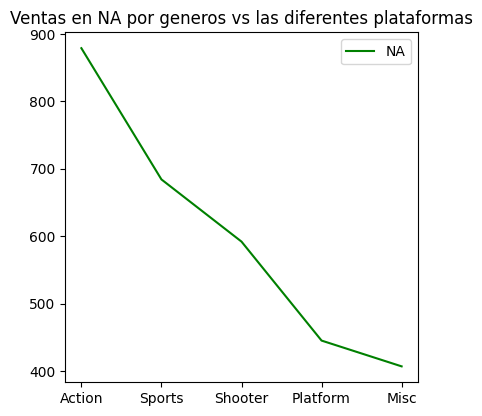

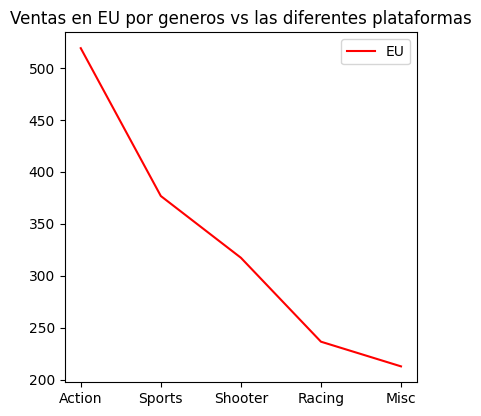

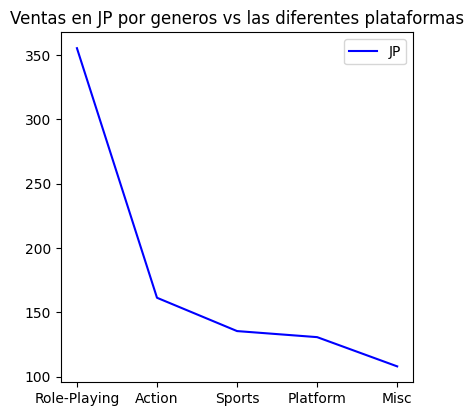

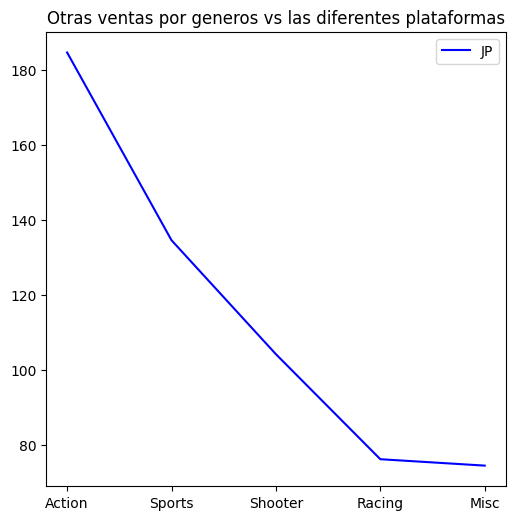

In [103]:
na_sales_genre=df.groupby(by=["genre"])['na_sales'].sum()
na_sales_genre=pd.DataFrame(na_sales_genre)
na_sales_genre=na_sales_genre.sort_values(by=['na_sales'], ascending = False)

eu_sales_genre=df.groupby(by=["genre"])['eu_sales'].sum()
eu_sales_genre=pd.DataFrame(eu_sales_genre)
eu_sales_genre=eu_sales_genre.sort_values(by=['eu_sales'], ascending = False)

jp_sales_genre=df.groupby(by=["genre"])['jp_sales'].sum()
jp_sales_genre=pd.DataFrame(jp_sales_genre)
jp_sales_genre=jp_sales_genre.sort_values(by=['jp_sales'], ascending = False)

other_sales_genre=df.groupby(by=["genre"])['other_sales'].sum()
other_sales_genre=pd.DataFrame(other_sales_genre)
other_sales_genre=other_sales_genre.sort_values(by=['other_sales'], ascending = False)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Ventas en NA por generos vs las diferentes plataformas')
plt.plot(na_sales_genre.head(5), label='NA', color='green')
plt.legend()

plt.figure(figsize=(10,10))
plt.subplot(222)
plt.title('Ventas en EU por generos vs las diferentes plataformas')
plt.plot(eu_sales_genre.head(5), label='EU', color='red')
plt.legend()

plt.figure(figsize=(10,10))
plt.subplot(223)
plt.title('Ventas en JP por generos vs las diferentes plataformas')
plt.plot(jp_sales_genre.head(5), label='JP', color='blue')
plt.legend()

plt.figure(figsize=(10,10))
plt.subplot(224)
plt.title('Otras ventas por generos vs las diferentes plataformas')
plt.plot(other_sales_genre.head(5), label='JP', color='blue')
plt.legend()

plt.tight_layout()
plt.show()

Claramente vemos un compartamiento similar en cada region a exepcion de la region de japon, en japon podemos ver que el genero de vieojuegos que genera mas ventas es el de "Role_playing" segido de "Sports" y "Shooter" mientras que en las demas regiones tenemos a "action", "Sports" y "Shooter" como los mas vendidos. Teniendo en cuenta lo anterior sabemos que generos podemos crear videojuegos y en que plataformas para poder tener mas ventas con el mercado espicifico encontrado.

# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

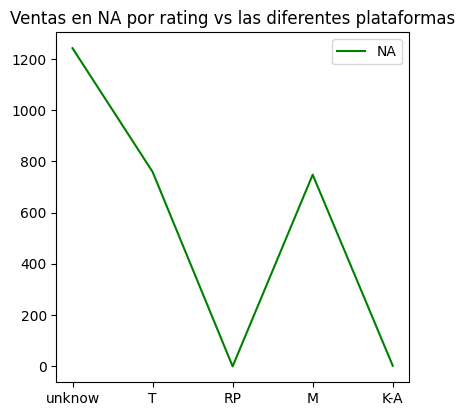

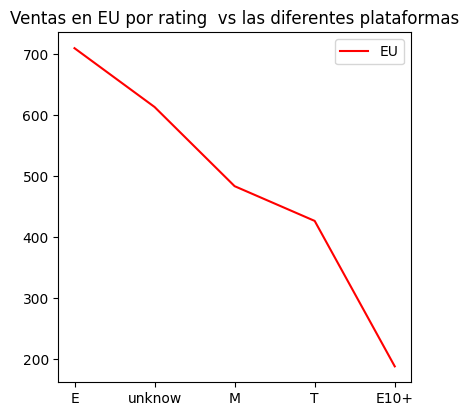

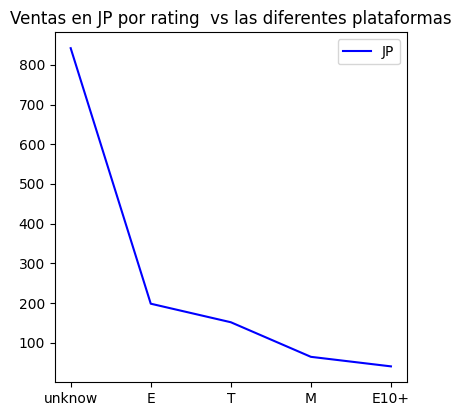

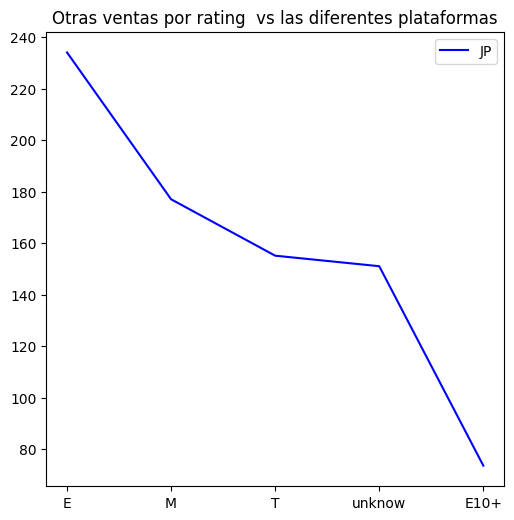

In [121]:
na_sales_rating = df.groupby(by = ["rating"])['na_sales'].sum()
na_sales_rating = pd.DataFrame(na_sales_rating)
na_sales_rating = na_sales_rating.sort_values(by = ['rating'], ascending = False)

eu_sales_rating = df.groupby(by = ["rating"])['eu_sales'].sum()
eu_sales_rating = pd.DataFrame(eu_sales_rating)
eu_sales_rating = eu_sales_rating.sort_values(by = ['eu_sales'], ascending = False)

jp_sales_rating = df.groupby(by = ["rating"])['jp_sales'].sum()
jp_sales_rating = pd.DataFrame(jp_sales_rating)
jp_sales_rating = jp_sales_rating.sort_values(by = ['jp_sales'], ascending = False)

other_sales_rating = df.groupby(by = ["rating"])['other_sales'].sum()
other_sales_rating = pd.DataFrame(other_sales_rating)
other_sales_rating = other_sales_rating.sort_values(by = ['other_sales'], ascending = False)

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.title('Ventas en NA por rating vs las diferentes plataformas')
plt.plot(na_sales_rating.head(5), label='NA', color='green')
plt.legend()

plt.figure(figsize=(10,10))
plt.subplot(222)
plt.title('Ventas en EU por rating  vs las diferentes plataformas')
plt.plot(eu_sales_rating.head(5), label = 'EU', color = 'red')
plt.legend()

plt.figure(figsize = (10,10))
plt.subplot(223)
plt.title('Ventas en JP por rating  vs las diferentes plataformas')
plt.plot(jp_sales_rating.head(5), label='JP', color='blue')
plt.legend()

plt.figure(figsize = (10,10))
plt.subplot(224)
plt.title('Otras ventas por rating  vs las diferentes plataformas')
plt.plot(other_sales_rating.head(5), label='JP', color='blue')
plt.legend()

plt.tight_layout()
plt.show()

# Prueba las siguientes hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [113]:

df_xbox_one = df[df['platform'] == 'XOne']["user_score"].dropna()
df_pc = df[df['platform'] == 'PC']["user_score"].dropna()


result = st.ttest_ind(df_xbox_one, df_pc)
alpha = 0.05

result.pvalue

if result.pvalue < alpha:

  print("Rechazamos la hypotesis nula. Las calificaciones promedio de los\
  usuarios para las plataformas Xbox One y PC son las mismas.")
else:
  print("No podemos rechazar la hipótesis nula. Las calificaciones promedio de los\
  usuarios para las plataformas Xbox One y PC son las mismas")
print('p_value: ', result.pvalue)


Rechazamos la hypotesis nula. Las calificaciones promedio de los  usuarios para las plataformas Xbox One y PC son las mismas.
p_value:  1.3896435533548819e-05


Se realiza la pueba estadistida ttest_ind la cual nos permite realizar la comparacion entre dos valores asi determinar si se rechaza la hipotesis.

 - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [122]:
df_genre_accion = df[df['genre'] == 'Action']["user_score"].dropna()
df_genre_sports = df[df['genre'] == 'Sports']["user_score"].dropna()

result = st.ttest_ind(df_genre_accion, df_genre_sports)
alpha = 0.05

result.pvalue

if result.pvalue < alpha:

  print("Rechazamos la hipotesis nula. Las calificaciones promedio de los\
  usuarios para los géneros de Acción y Deportes no son diferentes.")

else:
  print(f"No podemos rechazar la hipotesis nula. Las clasificaciones promedio de\
  los usuarios son diferentes para los géneros de Acción y Deportes")

print('p_value: ', result.pvalue)

No podemos rechazar la hipotesis nula  . Las clasificaciones promedio de  los usuarios son diferentes para los géneros de Acción y Deportes
p_value:  0.10406951359049141


igualmente se realiza la pueba ttest_ind para validar los promedio de los dos generos para determinar si la hipotesis podria anular